In [117]:
import kaggle
import pandas as pd
import numpy as np
import zipfile
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics 
from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KDTree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import seaborn as sns
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width, height)})

In [118]:
# !kaggle competitions download -c playground-series-s4e6
# with zipfile.ZipFile('playground-series-s4e6.zip', 'r') as zip_ref:
#     zip_ref.extractall()

In [119]:
df_train = pd.read_csv('train.csv')

def clean_data(df):
    one_hot = pd.get_dummies(df['Target'], prefix='Target')
    
    df = df.join(one_hot)
     
    return df

df = clean_data(df_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Scholarship holder', ylabel='Target_Graduate'>

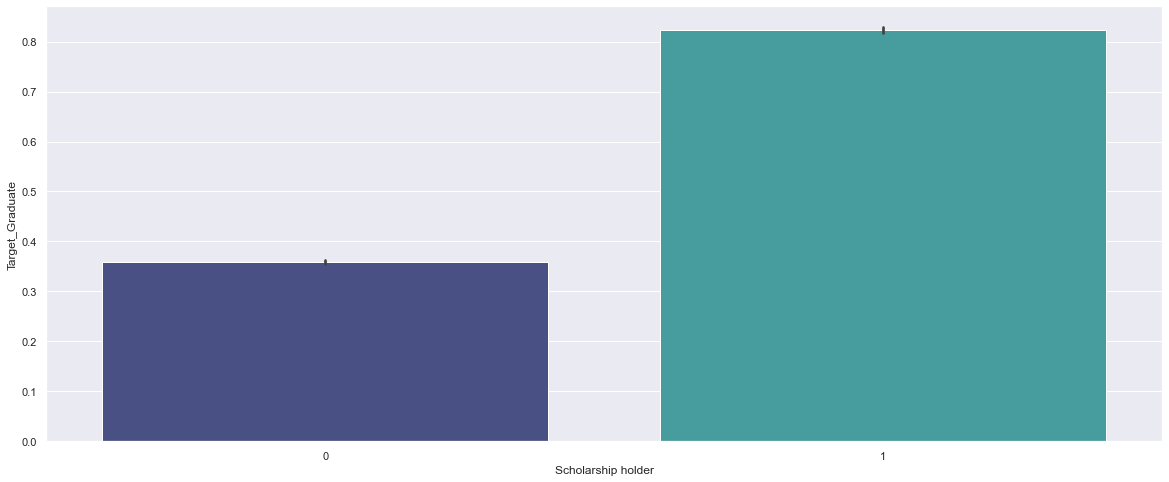

In [120]:
sns.barplot('Scholarship holder', 'Target_Graduate', data=df, palette='mako')

<AxesSubplot:xlabel='Admission grade', ylabel='Density'>

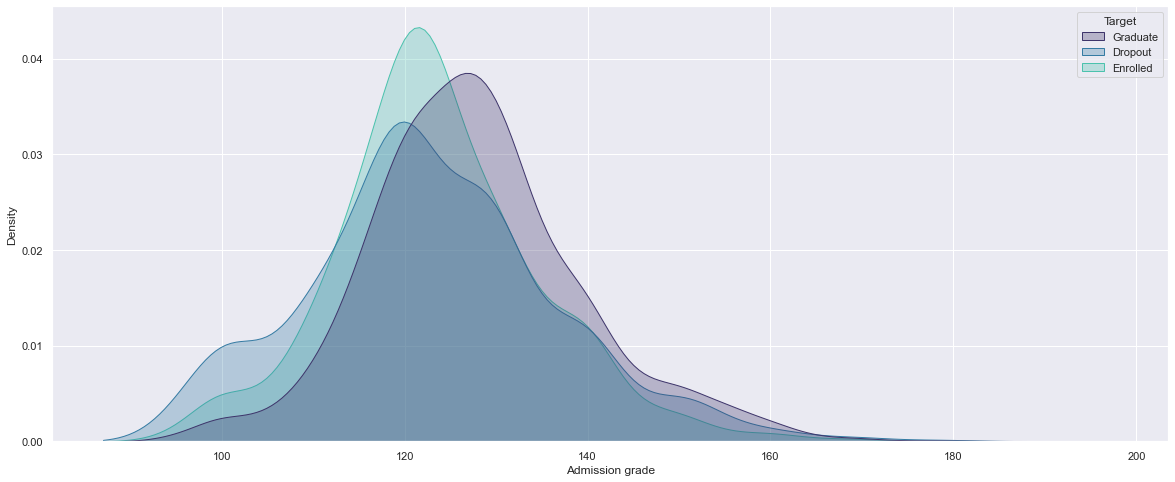

In [121]:
sns.kdeplot(data=df, x="Admission grade", hue='Target', bw_adjust=2,
            cumulative=False, common_norm=False, common_grid=True,
            fill=True, palette="mako", alpha=.3, linewidth=1)

<AxesSubplot:xlabel='Age at enrollment', ylabel='Density'>

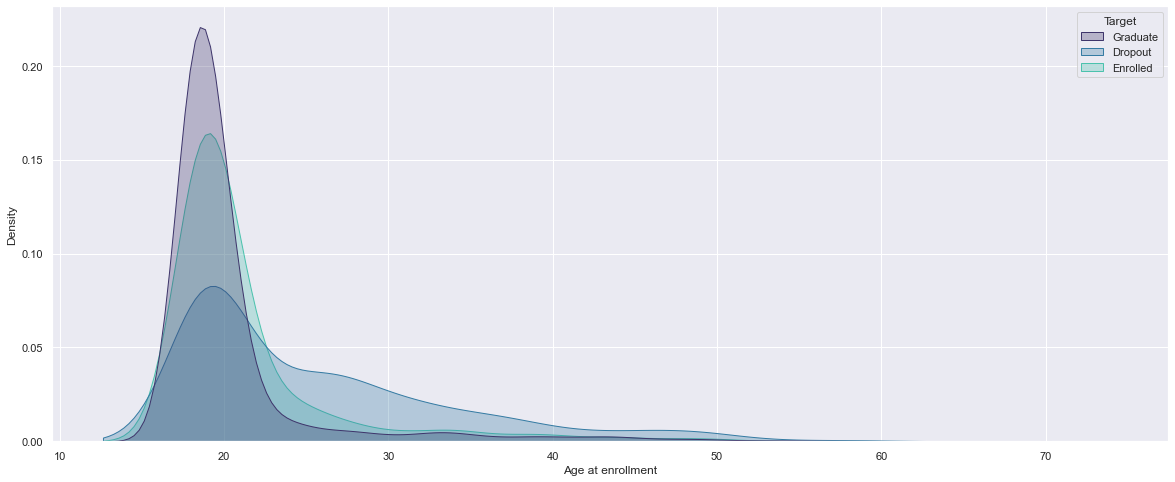

In [122]:
sns.kdeplot(data=df, x="Age at enrollment", hue='Target', bw_adjust=2,
            cumulative=False, common_norm=False, common_grid=True,
            fill=True, palette="mako", alpha=.3, linewidth=1)

<AxesSubplot:xlabel='Curricular units 1st sem (grade)', ylabel='Density'>

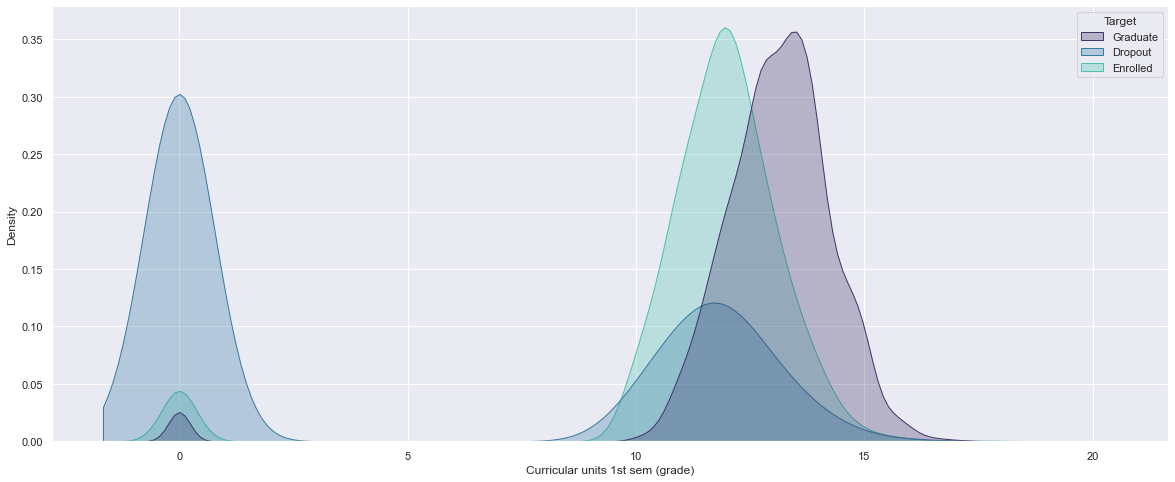

In [123]:
sns.kdeplot(data=df, x="Curricular units 1st sem (grade)", hue='Target', bw_adjust=1,
            cumulative=False, common_norm=False, common_grid=True,
            fill=True, palette="mako", alpha=.3, linewidth=1)

<AxesSubplot:xlabel='Curricular units 2nd sem (grade)', ylabel='Density'>

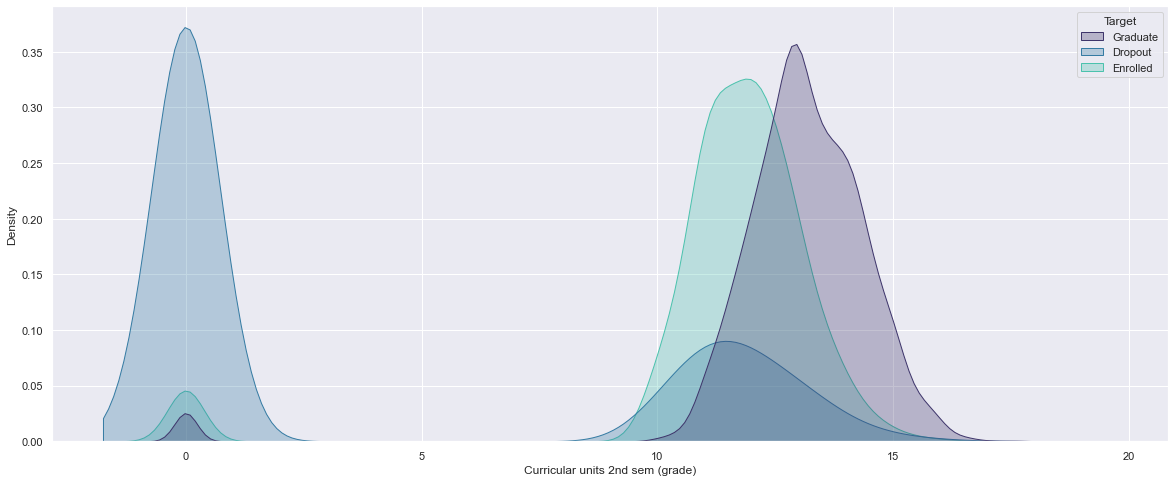

In [124]:
sns.kdeplot(data=df, x="Curricular units 2nd sem (grade)", hue='Target', bw_adjust=1,
            cumulative=False, common_norm=False, common_grid=True,
            fill=True, palette="mako", alpha=.3, linewidth=1)

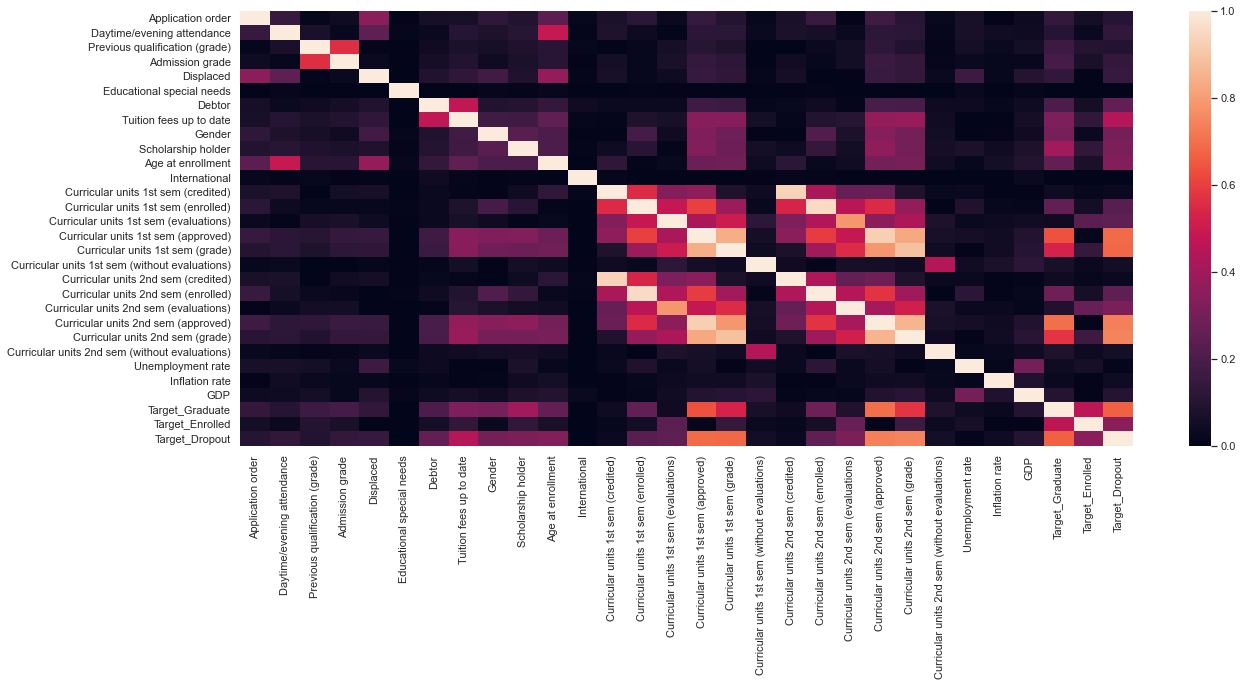

In [136]:
exog=['Application order', 'Daytime/evening attendance', 'Previous qualification (grade)', 'Admission grade',
      'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
      'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
      'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
      'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 
      'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
      'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
      'Inflation rate', 'GDP', 'Target_Graduate', 'Target_Enrolled', 'Target_Dropout']
heatmap = sns.heatmap(abs(df[exog].corr()), vmin=0, vmax=1)
